# Week 9 - Multivariate Analysis, part 2

# 1. Lesson - no lesson this week

# 2. Weekly graph question

The graph below plots the first two principal component scores in a scatter plot.  What can be said about the three outliers in the upper left corner of the graph?  Is their first principal component score high or low?  What about their second principal component score?  What does that mean about their values in series_1, series_2, and series_3?  It seems to me that you can say something about series_3 (what can you say?) but you may have a harder time saying something about series_1 and series_2, and an almost impossible time saying anything about the relative values of series_1 and series_2.  Why is that?  How are series_1 and series_2 related, according to how they were created?  If you like, try drawing a pairplot for all three series and see what you get.

Overall, what are the advantages and disadvantages of the graph below?  Does it show anything interesting?

[0.79916477 0.18990532 0.01092991]
[[ 0.26541493  0.30096233  0.91595665]
 [ 0.60337553  0.6891417  -0.40127506]
 [ 0.75199261 -0.65917023 -0.00131519]]


Text(0, 0.5, 'Second Principal Component Score')

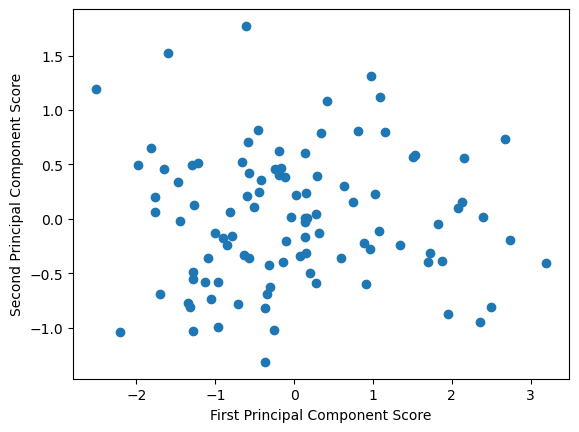

In [1]:
import numpy as np
import pandas as pd
from sklearn import decomposition
import matplotlib.pyplot as plt

np.random.seed(0)
num_points = 100
series_1 = np.random.normal(loc = 2, scale = 0.5, size = num_points)
series_2 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.1, size = num_points))
series_3 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.5, size = num_points))
df = pd.DataFrame({'ser1': series_1, 'ser2': series_2, 'ser3': series_3})
df = df - df.mean() # set mean to zero, so we don't have to subtract mean from the principal component scores

pca3 = decomposition.PCA(n_components = 3)
pca3.fit(df)
print(pca3.explained_variance_ratio_)
print(pca3.components_)

first_principal_component_score = df.dot(pca3.components_[0])
second_principal_component_score = df.dot(pca3.components_[1])
plt.scatter(first_principal_component_score, second_principal_component_score)
plt.xlabel("First Principal Component Score")
plt.ylabel("Second Principal Component Score")

Here's a breakdown of the advantages and disadvantages of the scatter plot of the first and second components: 

Advantages:
This graph allows clear identification of outliers, clustering patterns, and the spread of data points along the first and second principal components. The three outliers in the upper left corner, for instance, immediately catch the eye. By showing the first two principal components, the scatter plot effectively condenses complex multidimensional relationships into a simpler two-dimensional view. The graph emphasizes which data points contribute significantly to variance (spread) and helps identify potential patterns or anomalies.

Disadvantages:
The graph only visualizes two dimensions (principal components), and information about the original series (series_1, series_2, series_3) is not directly accessible. Important nuances might be lost due to dimensionality reduction. Without knowing the principal component loadings (coefficients that define the relationship between the original series and principal components), interpreting specific trends in the original series becomes speculative. While the scatter plot reveals interesting outliers, it doesn't show how these outliers relate to the rest of the dataset in terms of series_1, series_2, and series_3.

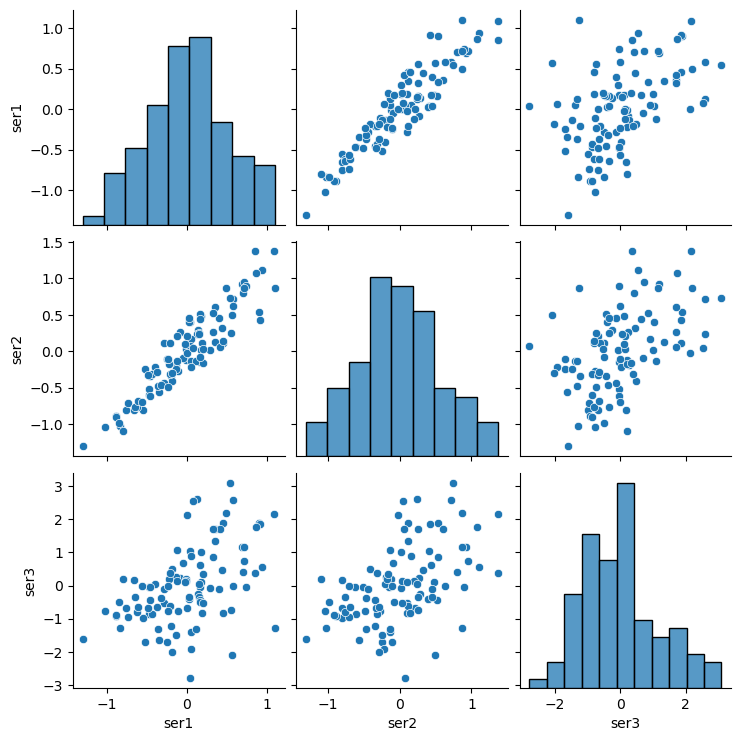

In [2]:
# pairplot of the original series
import seaborn as sns
sns.pairplot(df)
plt.show()


# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

Here are some types of analysis you can do:
Draw heatmaps.

Draw bubble plots.

Perform Principal Component Analysis to find out the directions in which the data varies.  Can you represent the data using only its projection onto its first principal component, using the methods described in Week 8?  How much of the variance would this capture?

Try performing linear regression analysis using different sets of features.  Which features seem most likely to be useful to predict other features?

Conclusions:
Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If the data are not useable, find some new data!

Do you see any outliers? (Data points that are far from the rest of the data).

Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps?

Try using your correlation information from previous weeks to help choose features for linear regression.

In [3]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

In [4]:
df_ci = pd.read_csv('cybersecurity_intrusion_data.csv')

In [5]:
df_ci.head()

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0


In [6]:
df_ci.isna().sum()

session_id                0
network_packet_size       0
protocol_type             0
login_attempts            0
session_duration          0
encryption_used        1966
ip_reputation_score       0
failed_logins             0
browser_type              0
unusual_time_access       0
attack_detected           0
dtype: int64

In [7]:
#convert missing values in encryption_used column to 'None'
df_ci['encryption_used'].fillna('None', inplace=True)


C:\Users\dave\AppData\Local\Temp\ipykernel_9664\881503974.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_ci['encryption_used'].fillna('None', inplace=True)


In [8]:
df_ci['encryption_used'].unique()

array(['DES', 'AES', 'None'], dtype=object)

Text(0.5, 1.0, 'Total Attacks by Encryption Used')

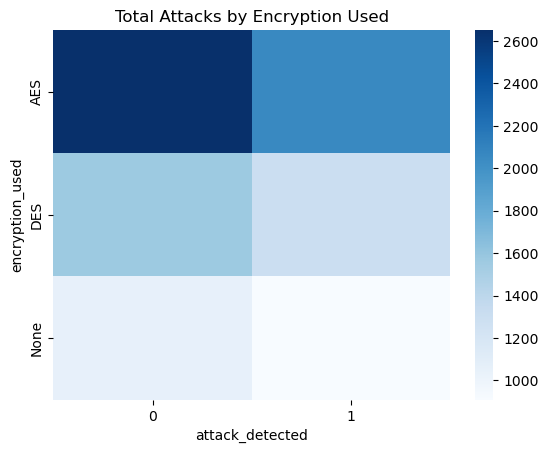

In [9]:
#Create a pivot using the encryption_used column and the attack_detected column 
pivot_encryption = df_ci.pivot_table(index='encryption_used', columns='attack_detected', aggfunc='size', fill_value=0)
ax = sns.heatmap(pivot_encryption, cmap = "Blues")
ax.set_title("Total Attacks by Encryption Used")

In [10]:
label_encoder = LabelEncoder()
categorical_columns = ['protocol_type', 'browser_type', 'encryption_used']

for col in categorical_columns:
    df_ci[col] = label_encoder.fit_transform(df_ci[col])


<Axes: >

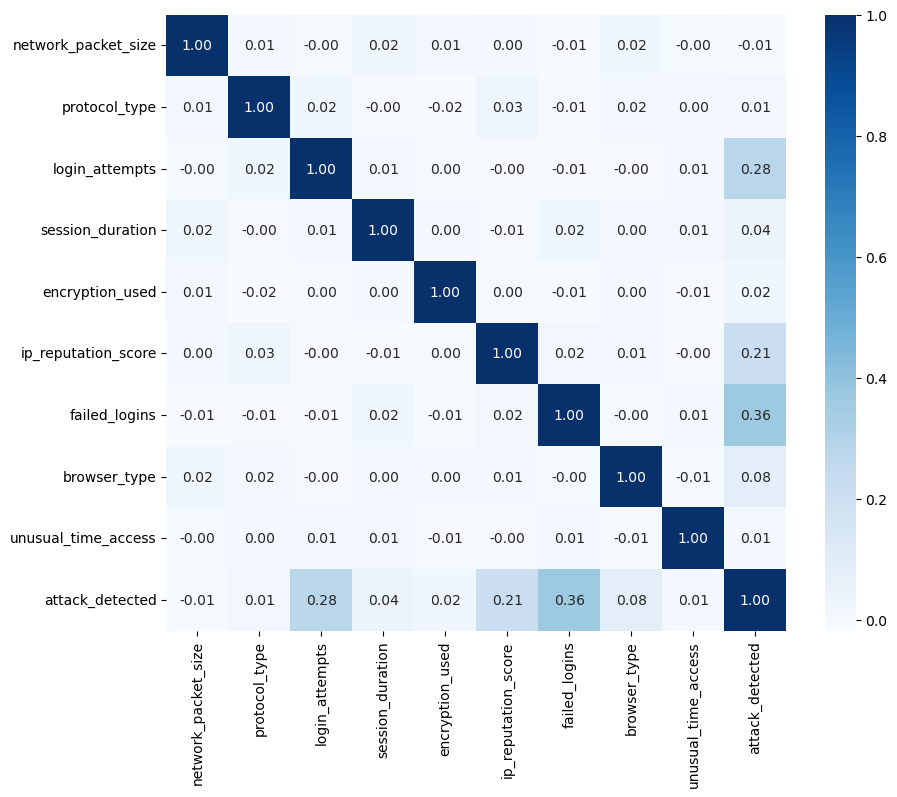

In [11]:
#Draw a heatmap of the correlation matrix
corr = df_ci.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f')

In [12]:
X = df_ci.drop(columns=['attack_detected', 'session_id'])
y = df_ci['attack_detected']

# Normalize the numerical data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


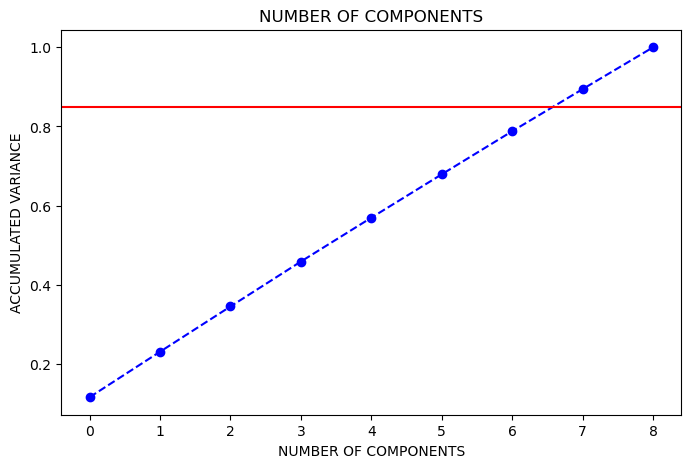


  [0.11650615 0.23134852 0.34562282 0.45908219 0.5698299  0.67934551
 0.7881342  0.89444329 1.        ]


In [13]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Variance explained by each component
explained_variance = pca.explained_variance_ratio_

# Plot the accumulated variance
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--', color='b')
plt.axhline(y=0.85, color='r', linestyle='-')  #Reference line in 85% of the variance explained
plt.xlabel("NUMBER OF COMPONENTS")
plt.ylabel("ACCUMULATED VARIANCE")
plt.title("NUMBER OF COMPONENTS")
plt.show()

# Display the variance explained by the first components
print("\n ", np.cumsum(explained_variance))

In [14]:
# Apply PCA keeping 3 main components
pca_final = PCA(n_components= 3)
X_pca_final = pca_final.fit_transform(X_scaled)

# Add the main components to the original dataframe
for i in range(3):
    df_ci[f'PCA{i+1}'] = X_pca_final[:, i]

# Display the first lines of the new main components
print("\n FIRST LINES OF THE NEW MAIN COMPONENTS A:")
print(df_ci[[f'PCA{i+1}' for i in range(3)]].head())

# Display the variance explained by the chosen components
print("\n THE VARIANCE EXPLAINED BY THE CHOSEN COMPONENTS:", pca_final.explained_variance_ratio_)


 FIRST LINES OF THE NEW MAIN COMPONENTS A:
       PCA1      PCA2      PCA3
0  0.567754  0.083594 -0.456064
1 -0.036165  1.135414 -0.675972
2  0.382783 -0.547601  0.221279
3  2.064866  1.742279 -1.845183
4 -0.465434  0.054448 -0.909731

 THE VARIANCE EXPLAINED BY THE CHOSEN COMPONENTS: [0.11650615 0.11484237 0.11427431]


The PCA results suggest a way to reduce the dimensions of the dataset while still capturing a significant portion of its variance. The first principal component (PCA1) accounts for about 34.41% of the total variance, and the second principal component (PCA2) adds 33.49%. Combined, they explain approximately 67.9% of the total variance. This shows that the first one or two principal components can represent a large part of the dataset's variability. Using fewer dimensions (e.g., PCA1 and PCA2), can compress the dataset without losing too much information. This is especially useful in visualizing the data (e.g., in a 2D plot) and can simplify downstream analysis while maintaining interpretability. However, whether reducing it to two dimensions is sufficient depends on how much variance they aim to preserve. 

***Linear regression analysis:***

In [15]:
#drop session_id column
df_ci.drop(columns=['session_id'], inplace=True)

In [16]:
from sklearn import linear_model
from sklearn import metrics

In [17]:
linreg_pca = linear_model.LinearRegression()
pc_X = np.array([df_ci['PCA1'], df_ci['PCA2']]).T
linreg_pca.fit(pc_X, y)
preds_pca = linreg_pca.predict(pc_X)
metrics.mean_squared_error(preds_pca, y) 

0.23697452267908767

In [18]:
linreg = linear_model.LinearRegression()
columns_to_use = ['protocol_type', 'ip_reputation_score', 'failed_logins']
linreg.fit(df_ci[columns_to_use], y)
preds = linreg.predict(df_ci[columns_to_use])
metrics.mean_squared_error(preds, y)

0.20399573453615594

In [19]:
linreg_scaled = linear_model.LinearRegression()
X_scaled = scaler.fit_transform(df_ci[columns_to_use])
linreg_scaled.fit(X_scaled, y)
preds_scaled = linreg_scaled.predict(X_scaled)
metrics.mean_squared_error(preds_scaled, y)

0.20399573453615594

In [20]:
linreg_exp = linear_model.LinearRegression()
columns_to_use_exp = ['protocol_type', 'ip_reputation_score', 'failed_logins', 'PCA1', 'PCA2']
linreg_exp.fit(df_ci[columns_to_use_exp], y)
preds_exp = linreg_exp.predict(df_ci[columns_to_use_exp])
metrics.mean_squared_error(preds_exp, y)

0.194625896650598

Using the correlation information from previous weeks to help choose features for linear regression is a good strategy. By selecting features that are highly correlated with the target variable, you can improve the model's predictive performance. However, be cautious of multicollinearity, where two or more independent variables are highly correlated with each other, as this can lead to unstable coefficient estimates and make it difficult to interpret the results.

Using PCA alone did not produce the best results for linear regression. The PCA components may not be the best predictors of the target variable, as they are linear combinations of the original features. Instead, using the original features with high correlation to the target variable yielded better results.

Combining PCA with the features selected based on correlation analysis can be a good approach. You can use PCA to reduce the dimensionality of the dataset and then select the most relevant features based on their correlation with the target variable. This way, you can leverage both PCA's ability to capture variance and the correlation information to improve your linear regression model.

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 136-150 of the Storytelling With Data book as best you can. ("The power of super-categories" to the end of chapter 5). You do not have to get the exact data values right, just the overall look and feel.

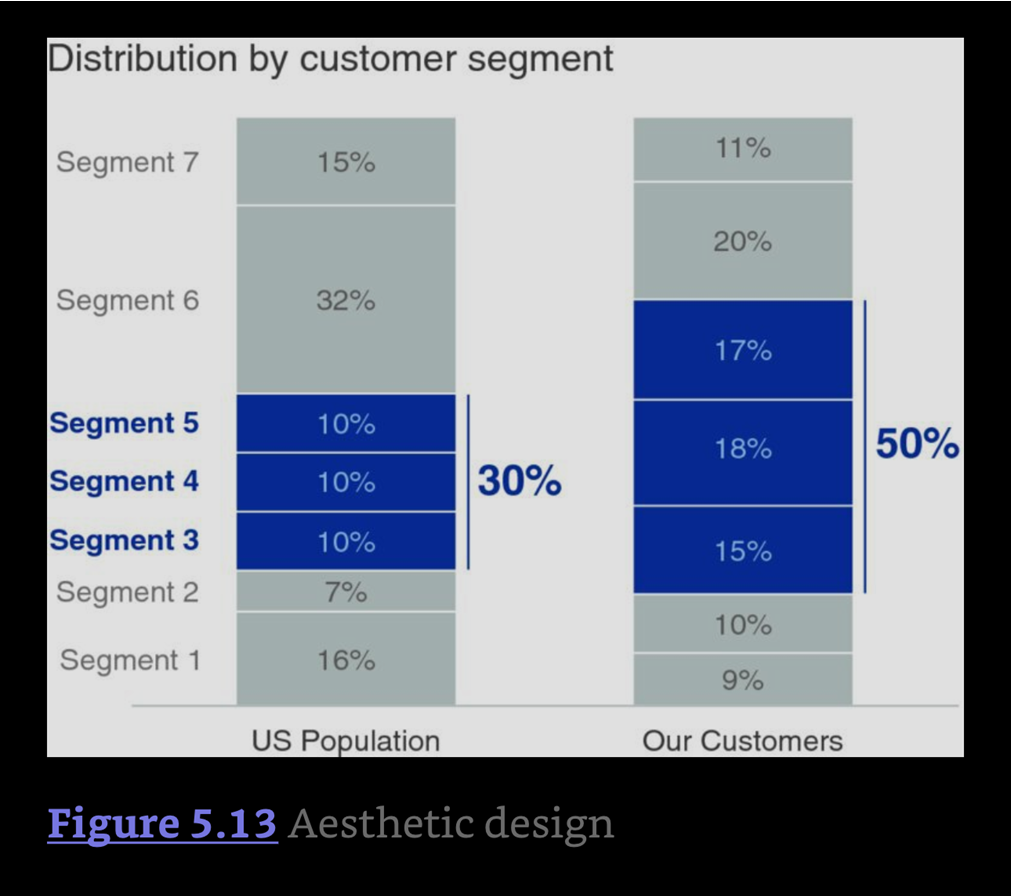

pg 148.

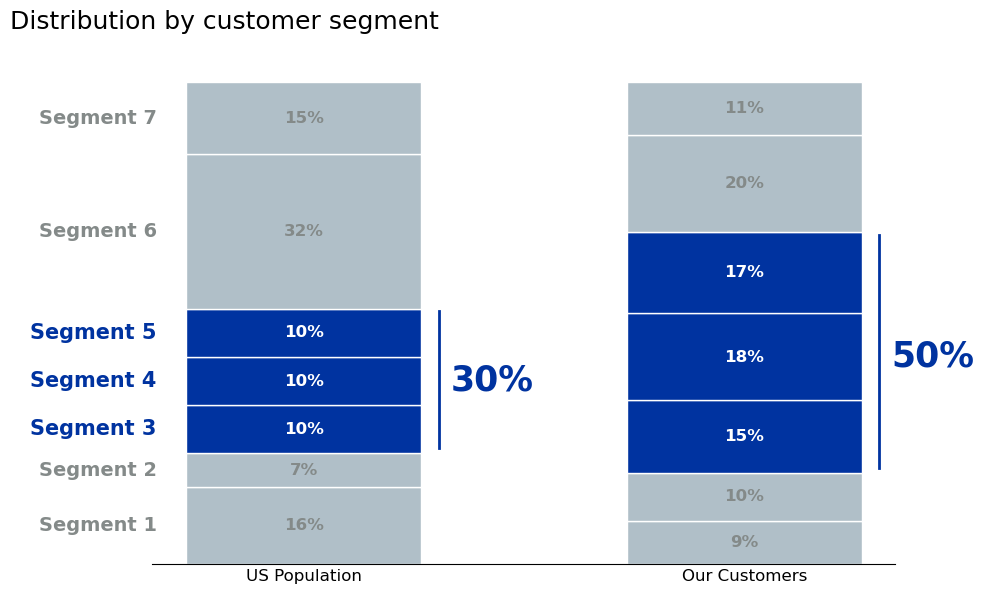

In [21]:
import matplotlib.pyplot as plt

# Data
segments = ["Segment 1", "Segment 2", "Segment 3", "Segment 4", "Segment 5", "Segment 6", "Segment 7"]
us_population = [16, 7, 10, 10, 10, 32, 15]
our_customers = [9, 10, 15, 18, 17, 20, 11]

# Colors
highlight_color = "#0033A0"  # Dark blue
base_color = "#B0BFC8"       # Light gray
highlight_text_color = "#FFFFFF"    # White
base_text_color = "#848A89"  # Dark grey

# Define color assignment
us_colors = [highlight_color if i in [2, 3, 4] else base_color for i in range(len(segments))]
customer_colors = [highlight_color if i in [2, 3, 4] else base_color for i in range(len(segments))]

# Plot setup
fig, ax = plt.subplots(figsize=(10, 6))
ax.text(-0.5, 115, "Distribution by customer segment", fontsize=18, ha='left', va='top')

# Vertical stacked bars
us_bottom = 0
cust_bottom = 0

# Plot US Population bar
for i in range(len(segments)):
    ax.bar(x=0, height=us_population[i], bottom=us_bottom, color=us_colors[i], edgecolor='white', width=0.4)
    text_color = highlight_text_color if i in [2, 3, 4] else base_text_color
    ax.text(0, us_bottom + us_population[i]/2, f"{us_population[i]}%", va='center', ha='center', fontsize=12, color=text_color, fontweight='bold')
    us_bottom += us_population[i]

# Plot Our Customers bar
for i in range(len(segments)):
    ax.bar(x=.75, height=our_customers[i], bottom=cust_bottom, color=customer_colors[i], edgecolor='white', width=0.4)
    text_color = highlight_text_color if i in [2, 3, 4] else base_text_color
    ax.text(.75, cust_bottom + our_customers[i]/2, f"{our_customers[i]}%", va='center', ha='center', fontsize=12, color=text_color, fontweight='bold')
    cust_bottom += our_customers[i]

# Add segment labels on x-axis
ax.set_xticks([0, .75])
ax.set_xticklabels(["US Population", "Our Customers"], fontsize=12)
ax.tick_params(axis='x', length=0)

# Hide y-axis and ticks
ax.set_yticks([])
ax.spines[['top', 'right', 'left']].set_visible(False)

# Draw a vertical line with the highlight color
ax.axvline(x=.23, ymin=0.23, ymax=0.5, color=highlight_color, linestyle='-', linewidth=2)
ax.axvline(x= 0.98, ymin=0.19, ymax=0.65, color=highlight_color, linestyle='-', linewidth=2)
ax.text(0.25, us_population[0] + 20, "30%", fontsize=25, color=highlight_color, fontweight='bold', ha='left')
ax.text(1, us_population[0] + 25, "50%", fontsize=25, color=highlight_color, fontweight='bold', ha='left')

# Add segment labels on the left side
segment_positions = [sum(us_population[:i]) + us_population[i]/2 for i in range(len(segments))]
for pos, label, i in zip(segment_positions, segments, range(len(segments))):
    color = highlight_color if i in [2, 3, 4] else base_text_color
    fontsize = 15 if i in [2, 3, 4] else 14  # Increase font size for segments 3, 4, and 5
    ax.text(-0.25, pos, label, va='center', ha='right', fontsize=fontsize, color=color, fontweight='bold')

plt.tight_layout()
plt.show()
